In [72]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

## K-Nearest Neighbors Classification

In [74]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object  #[7, 17, 15, 21, 25, 33]
model = KNeighborsClassifier(n_neighbors=15)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7922077922077922
Precision: 0.7936507936507936
Recall: 0.5882352941176471
F1-Score: 0.6756756756756757


## Confusion Matrix

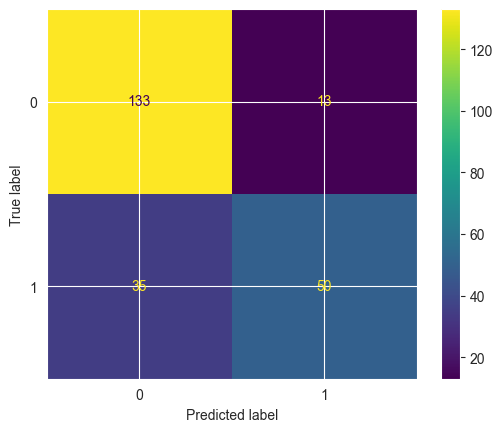

In [75]:

# Import the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # plot_confusion_matrix # 


# First, compute the confusion matrix
cm = confusion_matrix(target_test, model.predict(feature_test))

# Then, use ConfusionMatrixDisplay to plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# You can customize the display as needed. Here's how to display it:
disp.plot(values_format='d') # 'd' means integer formatting

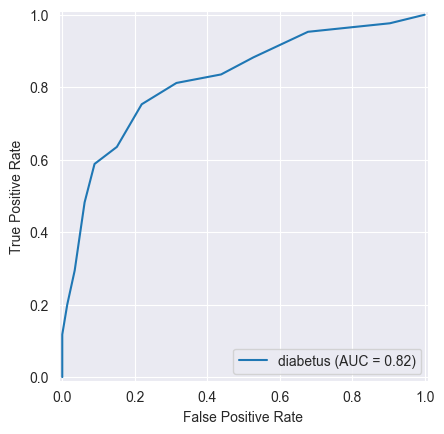

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# First, calculate the probabilities of predictions
predictions_prob = model.predict_proba(feature_test)[:, 1]

# Compute ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(target_test, predictions_prob)
roc_auc = roc_auc_score(target_test, predictions_prob)

# Create a ROC curve display
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='diabetus')

# Plot the ROC curve
disp.plot()

plt.show()


In [77]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.821917808219178


Q1. Based on the above confusion matrix, calculate by using the correct equation: Accuracy, Precision, Recall, F1-score. Explain the meaning of the numbers you get. 


Q2. Keep modifying the number of neighbours (K) to  7, 17, 15, 21, 25, 33, can you get a higher accuracy, F1-Score? Can you get a better AUC?


Q3. Compare your results to the accuracy and AUC of Logistic Regression Model.


Q4. Write down all of your comparisons/tables/charts and answers in a document/pdf file. 



In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

logistic_model = LogisticRegression()
logistic_model.fit(feature_train, target_train)

logistic_predictions = logistic_model.predict(feature_test)

logistic_accuracy = accuracy_score(target_test, logistic_predictions)

logistic_predictions_prob = logistic_model.predict_proba(feature_test)[:, 1]

logistic_auc = roc_auc_score(target_test, logistic_predictions_prob)

print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Model AUC:", logistic_auc)


Logistic Regression Model Accuracy: 0.7835497835497836
Logistic Regression Model AUC: 0.8628525382755842


C:\Users\Markus\OneDrive - BCIT\Desktop\term4\ACIT-4880-Introduction-to-Data-Analytics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
